In [3]:
#This script produces visualizations of the pairwise likelihood surfaces with 95% approximate confidence regions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon as patch_polygon

In [4]:
#Load pairwise likelihood surfaces for the given distance constraint
image_size = 25
image_name = str(image_size) + "_by_" + str(image_size)
local_folder = "/home/juliatest/Dropbox/likelihood_free_inference/neural_likelihood/brown_resnick"
distance_constraint = 1
unadjusted_pwlfields1_file = (local_folder + "/evaluate_nn/produce_pairwise_likelihood_surfaces/unadjusted/data/" 
                                     + image_name + "/dist_" + str(distance_constraint) + 
                                  "/single/reps/200/pairwise_likelihood_surfaces_9_by_9_density_" + image_name
                                    + "_image_200.npy")
unadjusted_pwl_fields1 = np.load(unadjusted_pwlfields1_file)
distance_constraint = 2
unadjusted_pwlfields2_file = (local_folder + "/evaluate_nn/produce_pairwise_likelihood_surfaces/unadjusted/data/" 
                                     + image_name + "/dist_" + str(distance_constraint) + 
                                  "/single/reps/200/pairwise_likelihood_surfaces_9_by_9_density_" + image_name
                                    + "_image_200.npy")
unadjusted_pwl_fields2 = np.load(unadjusted_pwlfields2_file)

spectral_adjusted_pwl_fields2_file = (local_folder + "/evaluate_nn/produce_pairwise_likelihood_surfaces/adjusted/data/surfaces" 
                                     + "/dist_" + str(distance_constraint) + 
                                  "/spectral/adjusted_pairwise_likelihood_surfaces_200.npy")

spectral_adjusted_pwl_fields2 = np.load(spectral_adjusted_pwl_fields2_file)

cholesky_adjusted_pwl_fields2_file = (local_folder + "/evaluate_nn/produce_pairwise_likelihood_surfaces/adjusted/data/surfaces" 
                                     + "/dist_" + str(distance_constraint) + 
                                  "/cholesky/adjusted_pairwise_likelihood_surfaces_200.npy")

cholesky_adjusted_pwl_fields2 = np.load(cholesky_adjusted_pwl_fields2_file)

dist_constraint = 5
unadjusted_pwlfields5_file = (local_folder + "/evaluate_nn/produce_pairwise_likelihood_surfaces/unadjusted/data/" 
                                     + image_name + "/dist_" + str(distance_constraint) + 
                                  "/single/reps/200/pairwise_likelihood_surfaces_9_by_9_density_" + image_name
                                    + "_image_200.npy")
unadjusted_pwl_fields5 = np.load(unadjusted_pwlfields5_file)

number_of_parameters = 81
number_of_reps = 200
#first column is variance and second is lengthscale
parameter_matrix = np.load((local_folder + "/evaluate_nn/generate_data/data/" + image_name + 
                            "/single/reps/200/evaluation_parameters_9_by_9_density_" + image_name + "_200.npy"))

possible_ranges = [round(.05*i,2) for i in range(1, 41)]
possible_ranges[39] = 1.99
possible_smooths = [round(.05*i,2) for i in range(1, 41)]
possible_smooths[39] = 1.99
#Cut off value that corresponds to 95 percent coverage for chi-distribution with 2 degrees of freedom (dimension of parameter space)
C = 5.99

In [5]:
#This function produces the 95 percent approximate confidence region over the parameter grid for a given pairwise likelihood surface
    #parameters:
        #pairwise_likelihood_surface: 40 by 40 matrix, pairwise likelihood surface for a given realization of the BR
        #possible_ranges: values of ranges on the parameter grid
        #possible_smooths: values of smooths on the parameter grid
        #C: cut off value that corresponds to 95 percent coverage for chi-distribution with 2 degrees of freedom 
                #(dimension of parameter space)
def produce_pairwise_likelihood_confidence_region(pairwise_likelihood_surface, possible_ranges, possible_smooths, C):

    max_field_value = np.max(pairwise_likelihood_surface)
    field_difference = 2*(max_field_value - pairwise_likelihood_surface)
    confidence_grid = np.where(field_difference <= C, 1, 0)
    
    #if we assume convex surface

    smooth_values = []
    range_values = []
    
    for i in range(0, confidence_grid.shape[0]):
        if(np.array(np.where((confidence_grid[i,:]) == 1)).any()):
            #min_val = (np.array(np.where((confidence_grid[i,:]) == 1))).min()
            max_val = (np.array(np.where((confidence_grid[i,:]) == 1))).max()
            smooth_values.append(possible_smooths[i])
            range_values.append(possible_ranges[max_val])

    for i in range((confidence_grid.shape[0] - 1), 0, -1):
        if(np.array(np.where((confidence_grid[i,:]) == 1)).any()):
            min_val = (np.array(np.where((confidence_grid[i,:]) == 1))).min()
            smooth_values.append(possible_smooths[i])
            range_values.append(possible_ranges[min_val])

    confidence_region = np.zeros((len(smooth_values),2))
    confidence_region[:,0] = range_values
    confidence_region[:,1] = smooth_values

    return confidence_region

#Produce visualization of pairwise likelihood surface with 95 percent approximate confidence region
    #parameters:
        #unadjusted_pairwise_likelihood_surface: 40 by 40 matrix, unadjusted pairwise likelihood surface for a given 
        #realization of the BR
        #possible_ranges: values of ranges on the parameter grid
        #possible_smooths: values of smooths on the parameter grid
        #C: cut off value that corresponds to 95 percent coverage for chi-distribution with 2 degrees of freedom 
          #(dimension of parameter space)
        #true_range: the range which generated the realization of the br
        #true_smooth: the smooth which generated the realization of the br
        #irep: the number referring to the specific realization for the given parameter on the grid
        #constant: the color scale for the visualization is set to span the maximum value of the 
            # surface and the maximum value of the surface minuse constant
        #dist_constraint: the distance constraint delta for the pairwise likelihood surface
def produce_unadjusted_pairwise_likelihood_confidence_region_surface(unadjusted_pairwise_likelihood_surface, possible_ranges,
                                                                     possible_smooths, C, true_range, true_smooth, irep,
                                                                     constant, dist_constraint):

    confidence_region = produce_pairwise_likelihood_confidence_region(unadjusted_pairwise_likelihood_surface, possible_ranges, 
                                                                      possible_smooths, C)
    polygon_figure = patch_polygon(confidence_region, facecolor = "none", edgecolor = "black", linewidth = 5)
    fig, ax = plt.subplots(figsize = (10,10))
    x = np.linspace(.05, 2, 40)
    y = np.linspace(.05, 2, 40)
    X, Y = np.meshgrid(x, y)
    Z = unadjusted_pairwise_likelihood_surface
    Z = Z.reshape((40, 40))
    max_indices = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    max_range = possible_ranges[max_indices[0]]
    max_smooth = possible_smooths[max_indices[1]]
    cp = ax.contourf(X, Y, Z, vmin = (np.amax(Z) -constant), vmax = np.amax(Z), levels = 10000)
    ax.add_patch(polygon_figure)
    ax.scatter(true_smooth, true_range, s = 600, marker = "*", c = "black")
    ax.scatter(max_smooth, max_range, s = 600, marker = "o", c= "red")
    legend_elements = [Line2D([0], [0], marker='*', color='w', label='True',
                          markerfacecolor='black', markersize=40), 
                          Line2D([0], [0], marker='o', color='w', label='Estimate',
                          markerfacecolor='red', markersize=30), Line2D([0], [0], marker='_', color='black', label='95% CR',
                          markerfacecolor='none', markersize=40, linewidth = 8)]
    ax.legend(handles = legend_elements, facecolor='white', framealpha=1, fontsize="25")
    ax.set_xlabel("smooth", fontsize = 40)
    ax.set_ylabel("range", fontsize = 40)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize =20)
    plt.title(("Pairwise Likelihood ($\delta = " + str(dist_constraint) + "$)"), fontsize = 45)
    plt.tight_layout()
    fig_name = (local_folder + 
                "/evaluate_nn/visualizations/visualize_approximate_confidence_regions/visualizations/pairwise_likelihood/dist_"
                + str(distance_constraint) + "/unadjusted/single/reps/200/" + str(constant) +
                "_unadjusted_pairwise_likelihood_approximate_confidence_region_95_smooth_" + str(round(true_smooth, 2))
     + "_range_" + str(round(true_range, 2)) + "_rep_" + str(irep) + ".png")
    plt.savefig(fig_name)

    #Produce visualization of adjusted pairwise likelihood surface with 95 percent approximate confidence region
    #parameters:
        #adjusted_pairwise_likelihood_surface: 40 by 40 matrix, adjusted pairwise likelihood surface for a given 
        #realization of the BR
        #possible_ranges: values of ranges on the parameter grid
        #possible_smooths: values of smooths on the parameter grid
        #C: cut off value that corresponds to 95 percent coverage for chi-distribution with 2 degrees of freedom 
          #(dimension of parameter space)
        #true_range: the range which generated the realization of the br
        #true_smooth: the smooth which generated the realization of the br
        #irep: the number referring to the specific realization for the given parameter on the grid
        #constant: the color scale for the visualization is set to span the maximum value of the 
            # surface and the maximum value of the surface minuse constant
        #matrix_type: the method used to compute the C matrix for the adjustment (see paper)
def produce_adjusted_pairwise_likelihood_confidence_region_surface(adjusted_pairwise_likelihood_surface, possible_ranges,
                                                                     possible_smooths, C, true_range, true_smooth, irep,
                                                                     constant, matrix_type):

    confidence_region = produce_pairwise_likelihood_confidence_region(adjusted_pairwise_likelihood_surface, possible_ranges, 
                                                                      possible_smooths, C)
    polygon_figure = patch_polygon(confidence_region, facecolor = "none", edgecolor = "black", linewidth = 5)
    fig, ax = plt.subplots(figsize = (10,10))
    x = np.linspace(.05, 2, 40)
    y = np.linspace(.05, 2, 40)
    X, Y = np.meshgrid(x, y)
    Z = adjusted_pairwise_likelihood_surface
    Z = Z.reshape((40, 40))
    max_indices = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    max_range = possible_ranges[max_indices[0]]
    max_smooth = possible_smooths[max_indices[1]]
    cp = ax.contourf(X, Y, Z, vmin = (np.amax(Z) -constant), vmax = np.amax(Z), levels = 10000)
    ax.add_patch(polygon_figure)
    ax.scatter(true_smooth, true_range, s = 600, marker = "*", c = "black")
    ax.scatter(max_smooth, max_range, s = 600, marker = "o", c= "red")
    legend_elements = [Line2D([0], [0], marker='*', color='w', label='True',
                          markerfacecolor='black', markersize=40), 
                          Line2D([0], [0], marker='o', color='w', label='Estimate',
                          markerfacecolor='red', markersize=30), Line2D([0], [0], marker='_', color='black', label='95% CR',
                          markerfacecolor='none', markersize=40, linewidth = 8)]
    ax.legend(handles = legend_elements, facecolor='white', framealpha=1, fontsize="25")
    ax.set_xlabel("smooth", fontsize = 40)
    ax.set_ylabel("range", fontsize = 40)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize =20)
    plt.title("Adjusted Pairwise Likelihood ($\delta = 2$)", fontsize = 35)
    plt.tight_layout()
    fig_name = (local_folder + 
                "/evaluate_nn/visualizations/visualize_approximate_confidence_regions/visualizations/pairwise_likelihood/dist_"
                + str(distance_constraint) + "/adjusted/" + matrix_type + "/single/reps/200/" + str(constant) +
                "_adjusted_pairwise_likelihood_approximate_confidence_region_95_smooth_" + str(round(true_smooth, 2))
                + "_range_" + str(round(true_range, 2)) + "_rep_" + str(irep) + ".png")
    plt.savefig(fig_name)

Locator attempting to generate 9183 ticks ([-16979.4, ..., -15602.100000000002]), which exceeds Locator.MAXTICKS (1000).


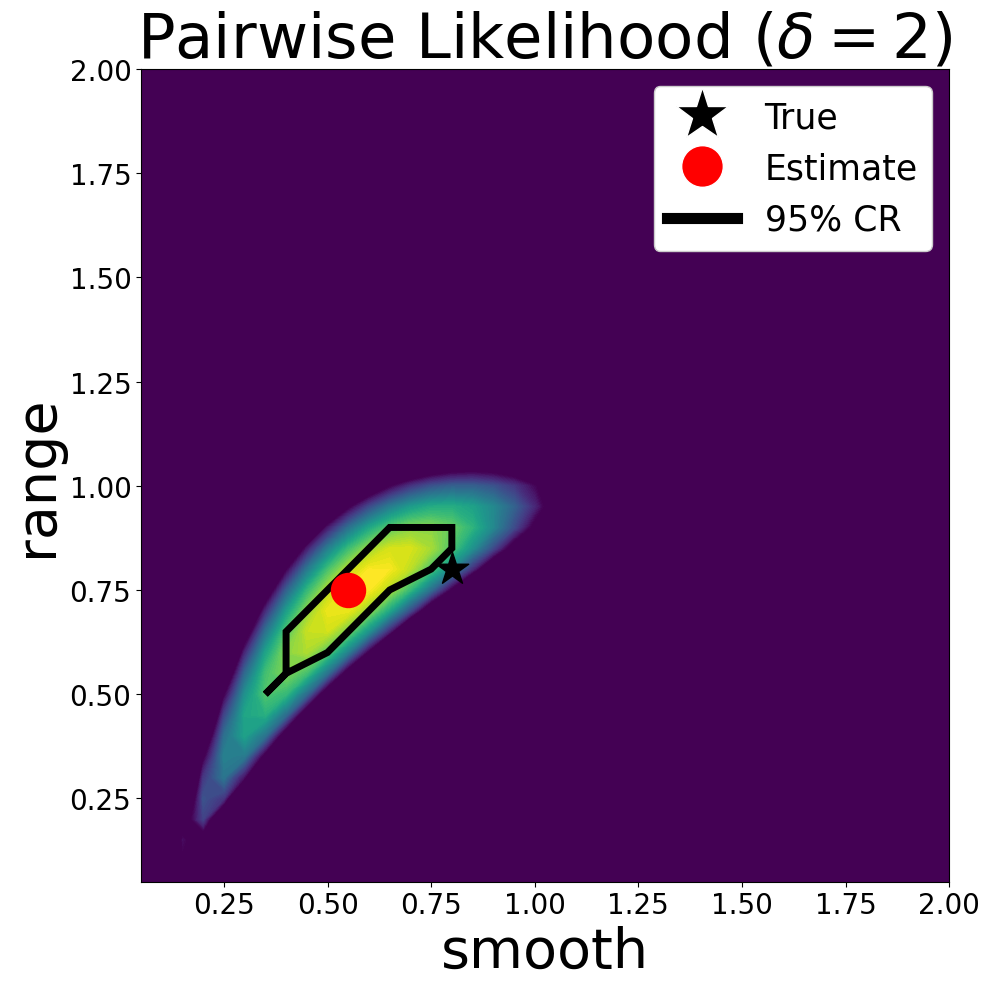

In [8]:
#These are the indices for the 4 by 4 grid over the parameter space starting at (.4,.4) and increasing by increments of .4
indices = [10,12,14,16,28,30,32,34,46,48,50,52,64,66,68,70]
constant = 10

for ipred in [30]:
    for irep in range(14,15):
        #first column is range
        current_range = parameter_matrix[ipred,0]
        current_smooth = parameter_matrix[ipred,1]
        produce_unadjusted_pairwise_likelihood_confidence_region_surface(unadjusted_pwl_fields2[ipred,irep,:,:], 
                                                                         possible_ranges, possible_smooths, C,
                                                                         current_range, current_smooth, irep, constant,
                                                                         dist_constraint = 2)

Locator attempting to generate 9905 ticks ([-15800.1, ..., -15602.02]), which exceeds Locator.MAXTICKS (1000).


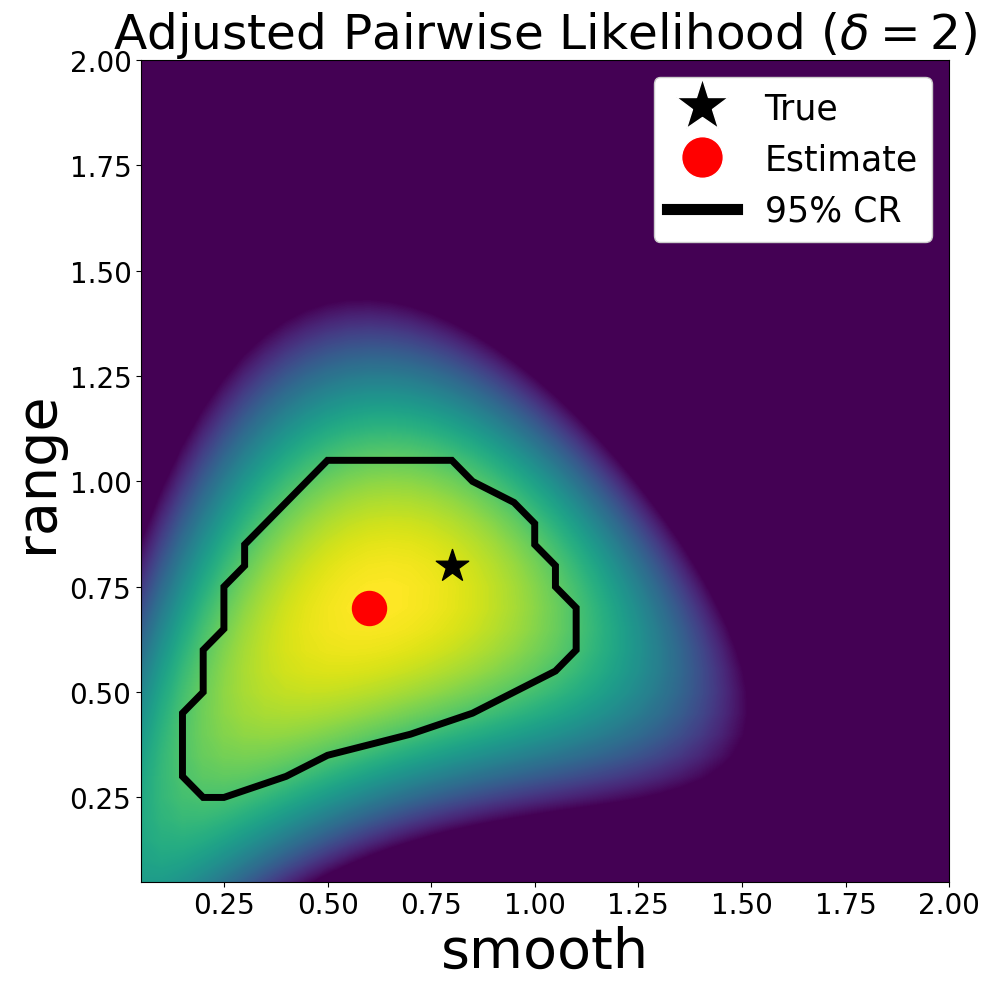

In [7]:
#These are the indices for the 4 by 4 grid over the parameter space starting at (.4,.4) and increasing by increments of .4
indices = [10,12,14,16,28,30,32,34,46,48,50,52,64,66,68,70]
constant = 10

for ipred in [30]:
    for irep in range(14,15):
        #first column is range
        current_range = parameter_matrix[ipred,0]
        current_smooth = parameter_matrix[ipred,1]
        produce_adjusted_pairwise_likelihood_confidence_region_surface(cholesky_adjusted_pwl_fields2[ipred,irep,:,:], 
                                                                         possible_ranges, possible_smooths, C,
                                                                         current_range, current_smooth, irep, constant,
                                                                         "cholesky")